# Avaliação Intermediária

NOME: **Giulia Gomes Vallente** <br>
E-MAIL: **giuliagv@al.insper.edu.br**

Esta é a A.I. de Álgebra Linear e Teoria da Informação de 1s2024.

INSTRUÇÕES:

1. Faça todas as questões
1. Salve o notebook
1. Envie o notebook salvo no Blackboard

IMPORTANTE:

* Você pode consultar qualquer material presente no seu computador, mas não pode consultar qualquer materiais online, colegas ou pessoas humanas, presentes ou não na prova.
* Não é permitida a utilização de geradores de texto, como o GPT-3 ou o copilot.
* O envio da prova será fechado às 11h45. Aqueles que não enviarem o material até este horário ficarão com zero.
* A prova vale um total de 10 pontos.
* Para todas as questões, usaremos a rubrica que segue anexa a esta prova. Há uma rubrica para a justificativa e uma rubrica para o código. A nota da questão é a menor entre as notas da justificativa e do código.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import pandas as pd

C:\Users\giuli\AppData\Local\Temp\ipykernel_3168\1205961170.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exercício 1

* Peso: 2 pontos

Dadas as matrizes e equações abaixo:

$$
A = \begin{bmatrix} 1 & 7\\ 3 & 2 \end{bmatrix} \\
$$

$$
B = \begin{bmatrix} 4 & 9\\ 8 & 2 \end{bmatrix} \\
$$

$$
C = \begin{bmatrix} 4 \\ 8 \end{bmatrix} \\
$$

$$
D = \begin{bmatrix} 4 \\ 8 \end{bmatrix} \\
$$

$$
E = C \odot D
$$

$$
F = <D^T, C>
$$

$$
G = EF
$$

$$
H = AB
$$

$$
ABBX = HAG
$$

responda:

Qual é o valor de $X$? Argumente sua resposta.

In [23]:
a = np.array([[1, 7],
              [3, 2]])

b = np.array([[4, 9],
             [8, 2]])

c = np.array([[4],
              [8]])

d = np.array([[4],
              [8]])

e = c * d

f = np.dot(d.T, c)

g = e @ f

h = a @ b

x = np.linalg.inv(b) @ a @ g
print(x)



[[ 820.]
 [3760.]]


#### Exercício 1 - Encontre o valor de X

O valor de X é:

$$
X =
\begin{bmatrix}
    820 \\
    3760
\end{bmatrix}
$$

Podemos obter o valor de X por meio da lógica abaixo:

$
\begin{aligned}
ABBX = HAG \\
HBX = HAG \\
H^{-1}HBX = H^{-1}HAG \\
BX = AG \\
B^{-1}BX = B^{-1}AG \\
X = B^{-1}AG 
\end{aligned}
$

# Exercício 2

* Peso: 3 pontos

Transforme a primeira imagem na segunda imagem utilizando transformações matriciais. Explique os processos de transformação utilizados e responda:

 - Você utilizou o processo de remoção de artefatos?
 - Este processo é necessário nesse caso?

*Dicas*:
 - Tanto a largura quanto a altura da imagem foram reduzidos para 75% dos valores originais. 
 - A segunda figura está 50% mais escura que a primeira.
 - Primeiro faça a transformação de escala e depois a transformação de cor.

<img src='ex2_exemplo.png' width="600" height="auto">

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


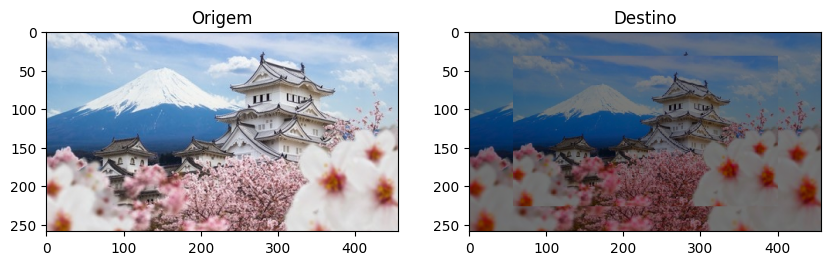

In [98]:
def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

yiq_converter = np.array( [[0.299, 0.587, 0.144], [0.5959, -0.2746, -0.3213], [0.2115, -0.5227, 0.3112]] )

#Mudança de cor

image = mpimg.imread("himeji-castle.jpeg")
image_ = np.zeros_like(image)

altura, largura, cores = image.shape
X = image.reshape(altura*largura, cores).T
X = yiq_converter @ X

R = np.array([[0.5, 0, 0], [0, 1, 0], [0, 0, 1]])
X =  R @ X

X = np.linalg.inv(yiq_converter) @ X
X = X.astype(int)
image_ = X.T.reshape(altura, largura, cores)


#Mudança de tamanho

X = criar_indices(0, image.shape[0], 0, image.shape[1])
X = np.vstack ( (X, np.ones( X.shape[1]) ) )

T = np.array([[1, 0, -image.shape[0]/2], 
              [0, 1, -image.shape[1]/2], 
              [0, 0, 1]])

A = np.array([[0.75, 0, 0], 
              [0, 0.75, 0], 
              [0, 0, 1]])

T2 = np.linalg.inv(T)

B = T2 @ A @ T 
Xd = np.linalg.inv(B) @ X
Xd = Xd.astype(int)
X = X.astype(int)

filtro = (Xd[0,:] < image.shape[0]) & (Xd[1,:] < image.shape[1]) & (Xd[0,:] >= 0) & (Xd[1,:] >= 0) 
Xd = Xd[:, filtro]
X = X[:, filtro]

image_[X[0,:], X[1,:], :] = image_[Xd[0,:], Xd[1,:], :]

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()

#### Exercício 2 - Transformando a primeira imagem na segunda imagem

O primeiro passo para transformar a imagem 1 na imagem 2 é diminuir a claridade da imagem 2, para isso, utilizamos a matriz yiq_converter, capaz de transformar nossas cores de RGB para YIQ e, assim, multiplicamos nossa matriz cores por uma matriz em que seu valor de Y é metade do original. Deste modo, somos capazes de escurecer a imagem e, por último, precisamos voltar nossa matriz cores para seu formatO RGB, para isso, basta fazermos o inverso da nossa matriz yiq_converter multiplicado pela nossa matriz cores.

O segundo passo é diminui a nossa imagem, para isso, precisamos primeiro transladar a nossa imagem para o canto da tela, afim de que o seu centro esteja no ponto (0, 0). Depois, utilizamos de uma matriz capaz de diminuir o tamanho da nossa imagem em 75% e, por último, multiplicamos o resultado pelo inverso da nossa matriz translação, afim de voltarmos a imagem para o centro da tela.

Neste caso, não precisamos utilizar o processo de remoção de artefatos pois estamos diminuindo o tamanho de nossa imagem, portanto, não haverão pixels pretos incompletos.


# Exercício 3

* Peso: 2.5 pontos

Uma pastelaria vende pastéis salgados, pastéis doces e quibes. Para praticar seus conhecimentos, ao invés de perguntar o preço de cada pastel, você resolveu anotar os pedidos de compras de outros clientes e utilizar seus conhecimentos de álgebra linear para calcular o preço de cada item.

* 9 pastéis salgados e 4 pastéis doces custaram R$127,00,
* 18 pastéis salgados e 8 pastéis doces custaram R$254,00,
* 8 pastéis salgados e 3 quibes custaram R$106,00,
* 16 pastéis salgados e 6 quibes custaram R$212,00,
* 4 pastéis doces e 3 quibes custaram R$46,00,
* 8 pastéis doces e 6 quibes custaram R$92,00.


*Usando estritamente formulações matriciais*, responda e justifique:
1. Qual é o preço de cada item?
1. Qual seria o valor de um pedido de 10 pastéis salgados, 5 pastéis doces e 4 quibes?

In [19]:
#Parte 1 - Qual é o preço de cada item?

pedidos = np.array([[9, 4, 0],
                    [8, 0, 3],
                    [0, 4, 3]])

totais = np.array([[127],
                   [106],
                   [46]])

precos = np.linalg.solve(pedidos, totais)
print(precos)


#Parte 2 - Qual seria o valor de um pedido de 10 pastéis salgados, 5 pastéis doces e 4 quibes?

pedido = np.array([[10, 5, 4]])

total = pedido @ precos
print(total)

[[11.]
 [ 7.]
 [ 6.]]
[[169.]]


#### Exercício 3 - Pastelaria

**1. Qual é o preço de cada item?**

O pastel salgado custa 11 reais, o pastel doce custa 7 reais e o quibe custa 6 reais. Podemos obter tais resultados por meio de uma simples multiplicação de matrizes.

Primeiro criamos uma matriz pedidos, com três pedidos distintos, que contenha a quatidade de cada um dos items pedidos por linha. Depois criamos uma matriz totais que contém o valor gasto em cada pedido por linha.

Por fim, precisamos inverter a nossa matriz pedidos e então multiplica-la pela nossa matriz totais, obtendo o preço de cada um dos itens.

$$
\begin{bmatrix}
    9, 4, 0 \\
    8, 0, 3 \\
    0, 4, 3
\end{bmatrix}
\begin{bmatrix}
    precoPastelSalgado \\
    precoPastelDoce \\
    precoQuibe
\end{bmatrix}
=
\begin{bmatrix}
    127 \\
    106 \\
    46
\end{bmatrix}
$$

$
\begin{aligned} \\
PedidosPrecos = Totais \\
Pedidos^{-1}PedidosPrecos = Pedidos^{-1}Totais \\
Precos = Pedidos^{-1}Totais 
\end{aligned}
$


**2. Qual seria o valor de um pedido de 10 pastéis salgados, 5 pastéis doces e 4 quibes?**

O valor de um pedido de 10 pastéis salgados, 5 pastéis doces e 4 quibes seria de 169 reais.

Agora que já sabemos o preço de cada um dos itens, afim de descobrimos o total deste pedido, podemos apenas multiplicar nossa matriz pedido pela nossa matriz preços encontrada no exercício anterior:

$$
\begin{bmatrix}
    10, 5, 4 \\
\end{bmatrix}
\begin{bmatrix}
    11 \\
    7 \\
    6
\end{bmatrix}
$$

A matriz pedido é uma matriz de apenas uma linha, contendo a quantidade de cada um dos itens pedidos.



# Exercício 4

* Peso: 2.5 pontos

Está havendo uma grande discussão na internet sobre o posicionamento de dois jogadores em uma partida de futebol. Os torcedores de um time estão dizendo que o jogador A estava na frente, enquanto os torcedores do outro time estão dizendo que o jogador B estava na frente.

O grande problema é que a única imagem nítida que temos foi gerada por um sistema de câmeras que não está alinhado com o campo. Para resolver a discussão, você decidiu utilizar seus conhecimentos de álgebra linear para converter as coordenadas dos jogadores e descobrir a posição deles.

Na imagem da câmera, o jogador A está no ponto $[72.5, -10.6]$ e o jogador B está no ponto $[41.5, -42.8]$. Podemos ver a imagem e as posições dos jogadores na nuvem de pontos abaixo.

Usando formulações matriciais e os pontos de referência abaixo, faça a conversão das posições dos jogadores para o sistema de coordenadas correto.

* $[0, 0.9] \rightarrow [0, 0]$
* $[1.5, 1.2] \rightarrow [1, 0]$
* $[1.7, 0.2] \rightarrow [2, 1]$

Por fim, responda: qual o jogador que está mais próximo do final do campo? Ou seja, qual dos dois pontos possui o maior valor na coordenada X.


[[70.]
 [25.]
 [ 1.]]
[[71.]
 [50.]
 [ 1.]]


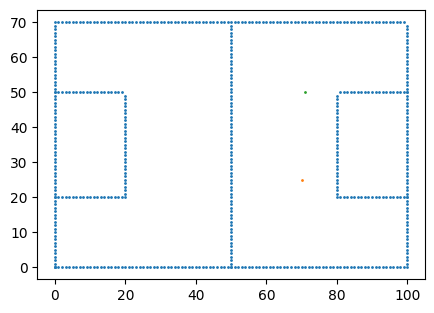

In [114]:
#Transportando o campo:

v = np.array([[0, 0.9], [1.5, 1.2], [1.7, 0.2]]).T
w = np.array([[0, 0], [1, 0], [2, 1]]).T

w = np.vstack((w, np.ones(w.shape[1])))
v = np.vstack((v, np.ones(v.shape[1])))

b = v @ np.linalg.inv(w)
b_inv = np.linalg.inv(b)


#Transportando jogador A

vA = np.array([[72.5, -10.6]]).T
vA = np.vstack((vA, np.ones(vA.shape[1])))

wA = b_inv @ vA
print(wA)

#Transportando jogador B

vB = np.array([[41.5, -42.8]]).T
vB = np.vstack((vB, np.ones(vB.shape[1])))

wB = b_inv @ vB
print(wB)

#Mostra novo formato do campo

x = np.loadtxt('point_cloud.out')
x_ = b_inv @ x

plt.figure(figsize=(5,3.5))
plt.scatter(x_[0,:-2], x_[1,:-2], s=1)
plt.scatter(x_[0,-2], x_[1,-2], s=1)
plt.scatter(x_[0,-1], x_[1,-1], s=1)
plt.show()

O jogador B está mais próximo do final do campo, visto que seu valor de x é 71 e do jogador A é 70.